# Проверка гипотез интернет магазина

Совместно с отделом маркетинга подготовлен список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Цель исследования:** Проверить какие из гипотез для увеличения выручки подтвердились.

**Ход исследования:**  
Часть 1
1. Обзор данных: приведение типов, проверка на дубликаты, форматирование;
1. Приоретизитизация гипотез по фреймворку ICE;
1. Приоретизитизация гипотез по фреймворку RICE;
1. Сравнение приоретизации по двум вышеуказанным фреймворкам.

Часть 2
1. Обзор данных: приведение типов, проверка на дубликаты, форматирование;
1. Построение следующих графиков куммулятивных метрик
    1. Выручка
    1. Средний чек
    1. Конверсия
1. Определение граничных значений для количества и стоимости заказов
1. Опредеоение статистической значимости различий в конверсии и среднем чеке между группами по "сырым" и "очищенным" данным
1. Вывод о результатах теста 

## Часть 1. Приоритизация гипотез

### Подготовка данных 

In [14]:
#Импортируем библиотеки
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

In [15]:
#Получаем данные из файла
try:
    hypothesis = pd.read_csv('datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('hypothesis.csv')

In [16]:
#проверяем содержимое
hypothesis.info()
pd.options.display.max_colwidth = 150
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [17]:
#проверяем на дубликаты 
if hypothesis.duplicated().sum() > 0:
    print('Найдено дубликатов:', hypothesis.duplicated().sum())
else:
    print('Явных дубликатов не обнаружено')

Явных дубликатов не обнаружено


- Пропусков нет
- Дубликатов нет
- Необходимо отформатировать название столбцов

In [18]:
#переименовываем столбцы
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

### Применение фреймворка ICE

Определим приоретизацию по фреймворку ICE.

In [19]:
hypothesis['ICE'] = hypothesis['confidence'] * hypothesis['impact'] / hypothesis['efforts']
print(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

### Применение фреймворка RICE

Определим приоретизацию по фреймворку RICE.

In [20]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['confidence'] * hypothesis['impact'] /hypothesis['efforts']
print(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

### Сравнение приоретизаций

Приоретизация по разным фреймворкам отличается. Это связано с тем, что во фреймворке `RICE` задействован параметр  `reach` (охват пользователей). В остальном формулы одинаковые. Таким образом гипотезы, у которых данный параметр больше, будут более приоритетными по сравнению в приоретизацией по `ICE`.  

Например у гипотезы "Добавить форму подписки на все основные страницы" охват выше, чем у "Запустить акцию, дающую скидку на товар в день рождения".  
А у "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" выше, чем у "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".

##  Часть 2. Анализ A/B-теста 

В данном разделе необходимо выполнить следующие задачи: 

1. Построить графики кумулятивных выручки, среднего и конверсии по группам, чтобы сравнить у какой группы эти показатели лучше
2. Определить граничные значения для среднего чека и количесва заказов на пользователя, чтобы избавиться от выбросов
3. Рассчитать статистическую значимсоть различий в среднем чеке и количестве заказов по группам по "сырым" и "очищенным" данным, чтобы оценить влияние выбросов
4. Определить итоги теста

### Подготовка данных

In [24]:
#Получаем данные из файла
try:
    visitors = pd.read_csv('visitors.csv')
    orders = pd.read_csv('orders.csv')
except:
    visitors = pd.read_csv('datasets/visitors.csv')
    orders = pd.read_csv('datasets/orders.csv')

In [25]:
#проверяем содержимое файла visitors
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [26]:
#проверяем на дубликаты 
if visitors.duplicated().sum() > 0:
    print('Найдено дубликатов:', visitors.duplicated().sum())
else:
    print('Явных дубликатов не обнаружено')

Явных дубликатов не обнаружено


- Пропусков нет
- Дубликатов нет
- Необходимо привести столбец `date` к типу datetime 

In [27]:
#приводим типы данных
visitors['date'] =  pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [28]:
#проверяем содержимое файла orders
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [29]:
#проверяем на дубликаты 
if orders.duplicated().sum() > 0:
    print('Найдено дубликатов:', orders.duplicated().sum())
else:
    print('Явных дубликатов не обнаружено')

Явных дубликатов не обнаружено


- Пропусков нет
- Дубликатов нет
- Необходимо отформатировать название столбцов
- Необходимо привести столбец `date` к типу datetime 

In [30]:
#переименовываем столбцы
orders.columns = orders.columns.str.replace('Id', '_id')
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [31]:
#приводим типы данных
orders['date'] =  pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Проверим даты начала и окончания тестирования для каждой группы. 

In [32]:
print(visitors.groupby('group').agg({'date': 'min'}))
print(visitors.groupby('group').agg({'date': 'max'}))
print(orders.groupby('group').agg({'date': 'min'}))
print(orders.groupby('group').agg({'date': 'max'}))

            date
group           
A     2019-08-01
B     2019-08-01
            date
group           
A     2019-08-31
B     2019-08-31
            date
group           
A     2019-08-01
B     2019-08-01
            date
group           
A     2019-08-31
B     2019-08-31


Начальные и конечные даты совпадают.

Проверим количество пользователей в каждой из групп.

In [33]:
print(orders.groupby('group').agg({'visitor_id': 'nunique'}))

       visitor_id
group            
A             503
B             586


В группе B пользователей больше, чем в группе А на 83. Это различие не критически большое, поэтому можно продолжать анализ теста с такой разницей в группах.

Проверим есть ли пользователи, которые присутствуют в обеих группах.

In [34]:
# составим сводную таблицу, где каждому пользоваетелю сотвествует в скольких группах он состоит
both_groups = orders.pivot_table(index='visitor_id', values='group', aggfunc='nunique')
# посчитаем сколько пользователей состоит в обеих группах
both_groups.query('group > 1').count()

group    58
dtype: int64

58 пользователей состоят в обеих группах. Исключим этих пользователей.

In [36]:
ids_to_delete = both_groups.query('group > 1').index
orders = orders.drop(orders.query('visitor_id.isin(@ids_to_delete)', engine='python').index)

### Кумулятивная выручка

Text(0.5, 1.0, 'Кумулятивная выручка')

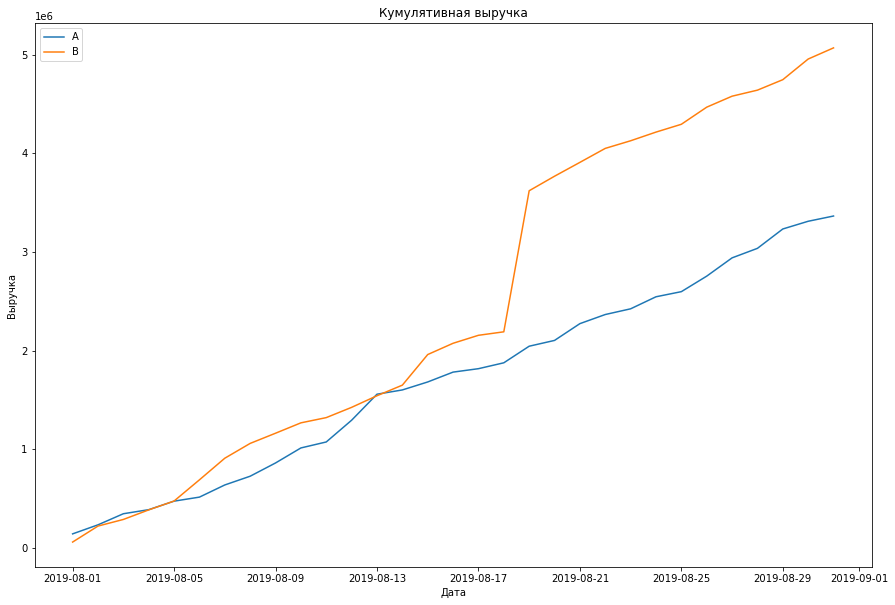

In [37]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

# получим агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получим агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
#присваиваем столбцам новые названия
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# задаём размер сетки для графиков
plt.figure(figsize=(15, 10))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка')

Выручка для группы А почти равномерно увеличивается в течение всего теста.   
Выручка для группы B нескольких точках резко возрастает. Такой рост может быть обусловлен увеличением числа заказов или появлением заказов с высокой стоимостью.

### Кумулятивный средний чек

Построим графики среднего чека по группам.

Text(0.5, 1.0, 'Кумулятивный средний чек')

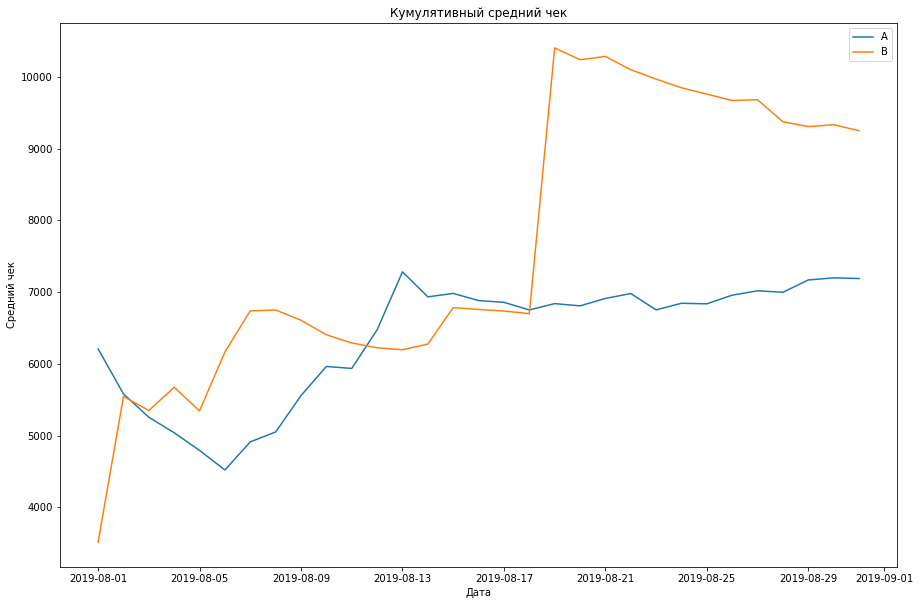

In [38]:
# построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(15, 10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Кумулятивный средний чек')


Ближе к концу теста значения становятся стабильными. Для группы B средний чек выше, чем для группы А. У группы B есть резкий скачок. Вероятно, причина в появлении заказов с высокой стоимостью.

### Относительное изменение кумулятивного среднего чека

Построим график относительного различия для среднего чека.

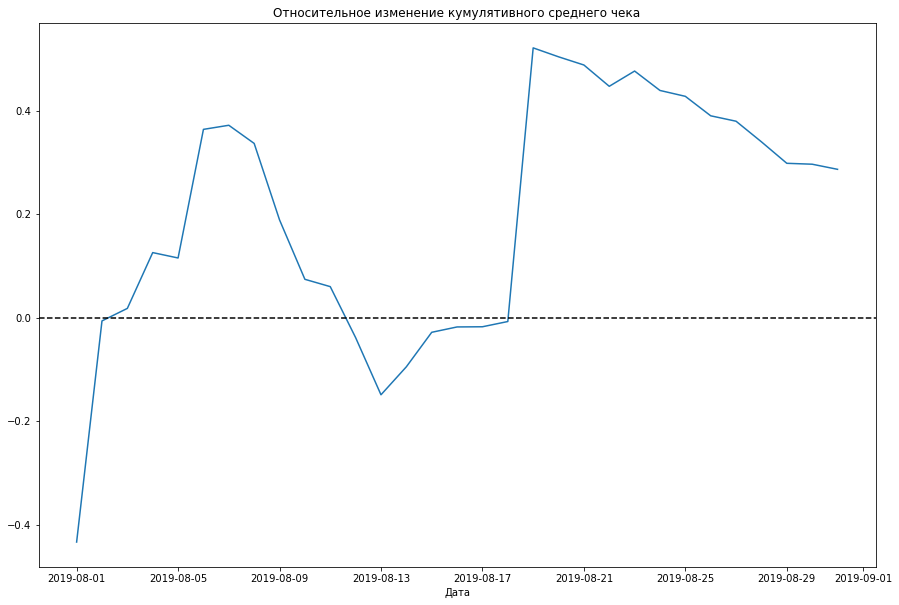

In [39]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15, 10))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивного среднего чека')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

В нескольких точках график различия между сегментами резко «скачет». Вероятно, есть выбросы.

### Кумулятивная конверсия

Построим графики конверсии по группам.

Text(0, 0.5, 'Конверсия')

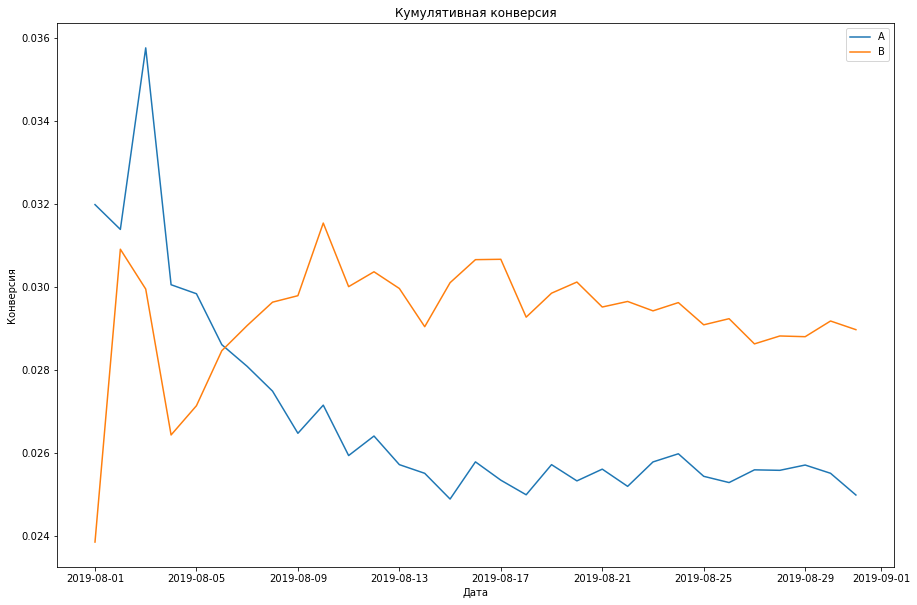

In [40]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 10))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.ylabel('Конверсия')


В начале теста значения не стабильны и сильно колеблются вокруг одного значения. Ближе к концу теста данные стабилизируются, конверсия у группы B выше.

### Относительное изменение кумулятивной конверсии

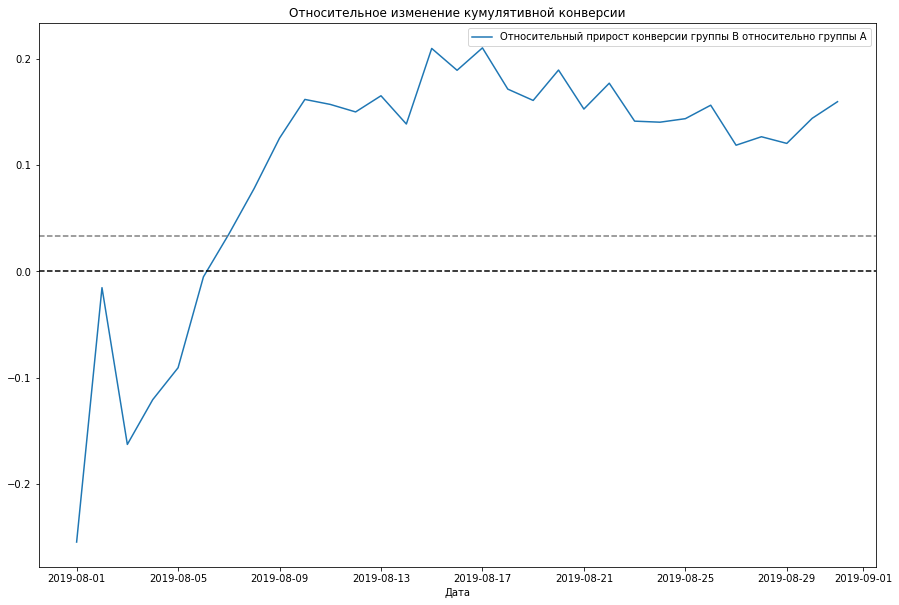

In [41]:
# собираем данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение конверсии
plt.figure(figsize=(15, 10))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивной конверсии')

# добавляем ось X  на 0, чтобы видеть перевес относительного прироста
plt.axhline(y=0, color='black', linestyle='--')
# добавляем ось X  на 0.033. Это значение, вокруг которого колеблются значения в начале теста
plt.axhline(y=0.033, color='grey', linestyle='--')

В начале теста значения группы B были то меньше, то больше группы А. Но потом стабильно группа  B стала лидировать.

### Количество заказов

Подсчитаем количество заказов по пользователям.

In [42]:
#сгруппируем данные по пользователю и посчитаем количество заказов для каждого пользователя
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique', 'group': 'unique' })
)

#переименуем столбцы
ordersByUsers.columns = ['visitor_id', 'orders', 'group']
#проверим результат
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

     visitor_id  orders group
908  3967698036       3   [A]
55    249864742       3   [B]
478  2108163459       3   [A]
687  2988190573       3   [A]
890  3908431265       3   [A]
138   611059232       3   [A]
632  2742574263       3   [B]
157   678354126       2   [A]
323  1404560065       2   [B]
452  1985475298       2   [B]


Построим точечный график количества заказов.

Text(0, 0.5, 'Количество заказов на пользователя')

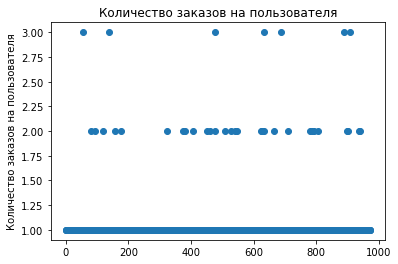

In [43]:
#задаем значения для оси X
x_values = pd.Series(range(0,len(ordersByUsers)))
#строим точечный график 
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Количество заказов на пользователя')
plt.ylabel('Количество заказов на пользователя')

Более двух заказов на пользователя встречается редко. 

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [44]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Не более 5% пользователей оформляли больше чем 1 заказ. И 1% пользователей заказывали более 2 раз.
Выберем 1 заказ на одного пользователя за верхнюю границу числа заказов.

### Стоимость заказов

Подсчитаем стоимость заказов по пользователям.

Text(0, 0.5, 'Стоимость заказов на пользователя')

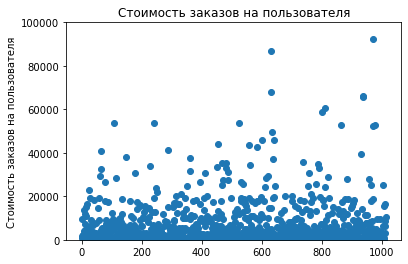

In [45]:
#задаем значения для оси X
x_values = pd.Series(range(0, len(orders['revenue'])))
#строим точечный график 
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 100000)
plt.title('Стоимость заказов на пользователя')
plt.ylabel('Стоимость заказов на пользователя')

Сумма заказов больше 30 000 встречается редко.

Посчитаем 95-й и 99-й перцентили стоимости заказов на пользователя.

In [46]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более 5% пользователей оформляли заказы более чем на 26 785. И 1% пользователей заказывали более чем на 53 904. Выберем 27 000 сумму заказа на одного пользователя за верхнюю границу суммы заказов.

### Cтатистическая значимость различий в среднем чеке между группами по «сырым» данным

Определим гипотезы:   
**H0:** Cтатистически значимых различий в среднем чеке между группами нет  
**H1:** Есть статистически значимые различия в среднем чеке между группами

Посчитаем статистическую значимость различия в среднем чеке между группами.  

Рассчитывать p-value будем по критерию Уилкоксона-Манна-Уитни.

In [47]:
# посчитаем количество посетителей в день в группе А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# посчитаем количество посетителей в день в группе А
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# количество пользователей до выбранной даты включительно в группе B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# количество заказов в день в группе А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# суммарное число заказов до выбранной даты включительно в группе A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# суммарное число заказов до выбранной даты включительно в группе B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# суммарное число заказов до выбранной даты включительно в группе B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# Вычисляем p-value и относительное изменение
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное изменение стоимости заказов групп B и А: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.829
Относительное изменение стоимости заказов групп B и А: 0.287


p-value > 0.05. Нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, **не отвергаем**.  

Относительное изменение составляет 29%

### Cтатистическая значимость различий в <s>конверсии</s>  среднем количестве заказов между группами по «сырым» данным

Определим гипотезы:   
**H0:** Cтатистически значимых различий в среднем количестве заказов между группами нет  
**H1:** Есть статистически значимые различия в среднем количестве заказов между группами

Посчитаем статистическую значимость различия в количестве заказов между группами.

In [48]:
# разделим датафрейм ordersByUsers по группам
ordersByUsersA = ordersByUsers[ordersByUsers['group'] == 'A']
ordersByUsersB = ordersByUsers[ordersByUsers['group'] == 'B']

In [49]:
# поставим каждому пользователю группы А количество заказов, которые он совершил
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# поставим каждому пользователю группы B количество заказов, которые он совершил
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# Вычисляем p-value и относительное изменение
print("p-value: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительное изменение количества заказов групп B и А: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.01102
Относительное изменение количества заказов групп B и А: 0.160


p-value < 0.05. **Отвергаем** нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет.  Можно сделать предположения, что различия есть.

Относительное изменение составляет 16%

### Cтатистическая значимость различий в среднем чеке между группами по «очищенным» данным

Отделим пользователей с большим количеством заказов и пользователей с дорогими заказами.  
- Дорогими будем считать заказы более 28 000
- Более 2-х заказов на пользователя будем считать большим количеством

In [50]:
# отделим пользователей с большим количеством заказов 
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitor_id'],
    ],
    axis=0,
)

# отделим пользователей с дорогими заказами
usersWithExpensiveOrders = orders[orders['revenue'] > 27000]['visitor_id']

# объединим оба датафрейма и выявим аномальных пользователей
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
# проверим результат и выведем количество таких пользователей
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

568     113298937
1099    148427295
928     204675465
55      249864742
684     358944393
Name: visitor_id, dtype: int64
86


Найдено 86 аномальных пользователей. Теперь посчитаем статистическую значимость без учета этих пользователей.

In [51]:
# Вычисляем p-value и относительное изменение
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительное изменение стоимости заказов групп B и А: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.727
Относительное изменение стоимости заказов групп B и А: -0.034


p-value > 0.05. Нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, **не отвергаем**.  

Относительное изменение составляет -3%

### Cтатистическая значимость различий в <s>конверсии</s> среднем количестве заказов между группами по «очищеным» данным

In [52]:
# отфильтруем ordersByUsersA от аномальных пользователей
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# отфильтруем ordersByUsersB от аномальных пользователей
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

# Вычисляем p-value и относительное изменение
print('p-value: {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное изменение количества заказов групп B и А: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.01593
Относительное изменение количества заказов групп B и А: 0.174


p-value < 0.05. **Отвергаем** нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет. Можно предложить, что отличия есть.  
 

Относительное изменение составляет 17%

### Выводы о результатах теста

- Есть статистически значимое различие по среднему количеству заказов между группами как по сырым данным, так и после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами как по сырым данным, так и после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту;
- График различия среднего чека колеблется. Сделать из этого графика определённые выводы нельзя.

Тест можно остановить и зафиксировать победу группы B. По конверсии (количеству заказов) данная группа побеждает.

## Итоги

1. В результате работы были приоретизированы гипотезы по фреймворкам 'ICE' и 'RICE'
1. Результаты проведения А/B теста проанализованы. Группу B можно считать победителем. Гипотеза проверяемая данным тестом может привести к увеличению выдержки.